# Conducting NBRA-based nonadiabatic dynamics

In [1]:
!tar -xf res_ks_step2_compressed

In [ ]:
!tar -xf res_ks_step2.tar.xz

In [2]:
import os
import sys
import time
import math

# Fisrt, we add the location of the library to test to the PYTHON path
from liblibra_core import *
from libra_py import units
import libra_py.workflows.nbra.lz as lz
import libra_py.workflows.nbra.step4 as step4
from libra_py import data_visualize
from libra_py import data_conv
import libra_py.workflows.nbra.decoherence_times as decoherence_times

import numpy as np
import matplotlib.pyplot as plt

colors = {}
colors.update({"1": '#000000'})  # Black 
colors.update({"2": '#000099'})  # Blue  
colors.update({"3": '#006400'})  # Green 
colors.update({"4": '#990000'})  # Red   
colors.update({"5": '#8B008B'})  # Purple
colors.update({"6": '#FF8C00'})  # Orange
colors.update({"9": '#4d4d4d'})  # Gray  
color_index = ["1","2","3","4","5","6","9"]


/projects/academic/cyberwksp21/Software/Conda/Miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  return f(*args, **kwds)
/projects/academic/cyberwksp21/Software/Conda/Miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, false> > already registered; second conversion method ignored.
  return f(*args, **kwds)
/projects/academic/cyberwksp21/Software/Conda/Miniconda3/envs/libra/lib/python3.6/import

In [9]:
print ("\nGathering data from MD ")
print ("Considering system", "Libra Tutorial: Single Rutile TiO2 Unit Cell - Kohn-Sham basis")

absolute_path = os.getcwd()
params = {}
params["data_set_paths"] = []
params["data_set_paths"].append(absolute_path+"/res_ks_step2/")

params["Hvib_re_prefix"] = "hvib_dia_"; params["Hvib_re_suffix"] = "_re"
params["Hvib_im_prefix"] = "hvib_dia_"; params["Hvib_im_suffix"] = "_im"
params["nfiles"]         = 99
params["init_times"]     = [0]
params["nstates"]        = 172 # total number of electronic states
params["active_space"]   = [79, 80, 81, 82, 83, 84, 85] # indexing is from 0!

# Include HOMO and up to the last electronic state
hvib = step4.get_Hvib2(params)
print ("Length of hvib is: ", len(hvib[0]))


Gathering data from MD 
Considering system Libra Tutorial: Single Rutile TiO2 Unit Cell - Kohn-Sham basis
Length of hvib is:  99


In [10]:
#Print the matrix elements: 0,0 1,1  0,1 0,2 . 
# The matrix elemnts are extracted with the .get() feature

print ( "\n Test, for energies")
print ( "CBM = ",   ( hvib[0][49].get(0,0) ).real / units.ev2Ha, " eV" )
print ( "VBM = ",   ( hvib[0][49].get(1,1) ).real / units.ev2Ha, " eV" )
print ( "VBM+1 = ", ( hvib[0][49].get(2,2) ).real / units.ev2Ha, " eV" )
print ( "VBM+2 = ", ( hvib[0][49].get(3,3) ).real / units.ev2Ha, " eV" )
print ( "VBM+3 = ", ( hvib[0][49].get(4,4) ).real / units.ev2Ha, " eV" )
print ( "VBM+4 = ", ( hvib[0][49].get(5,5) ).real / units.ev2Ha, " eV" )
print ( "VBM+5 = ", ( hvib[0][49].get(6,6) ).real / units.ev2Ha, " eV" )


 Test, for energies
CBM =  7.483694934819999  eV
VBM =  7.55832164654  eV
VBM+1 =  7.607044030479998  eV
VBM+2 =  7.67252104345  eV
VBM+3 =  7.729105229509999  eV
VBM+4 =  7.799704441119999  eV
VBM+5 =  7.890621290099999  eV


In [15]:
params["init_times"] = [0]
params["nsteps"] = 99
# Compute energy gaps and decoherence times over part of the trajectory we want
tau, rates = decoherence_times.decoherence_times_ave(hvib, [params["init_times"][0]], params["nsteps"], 0)
dE         = decoherence_times.energy_gaps_ave(      hvib, [params["init_times"][0]], params["nsteps"])
avg_deco   = tau/units.fs2au
print ("Decoherence time for CBM / VBM =", tau.get(0,1)/units.fs2au, "fs")
params["decoherence_constants"] = 1
params["decoherence_times"]     = tau

Decoherence time for CBM / VBM = 36.6961940673382 fs


In [16]:
params["T"]                  = 300.0
params["ntraj"]              = 500
params["sh_method"]          = 1
params["decoherence_method"] = 0
params["dt"]                 = 1.0*units.fs2au
params["Boltz_opt"]          = 1
params["outfile"]            = "_out_NBRA_NAMD.txt"

In [17]:
start = time.time()
params["istate"]    = 4 # Recall index from 0
res_istate_lumo_p_3 = step4.run(hvib, params)
end = time.time()
print("Time to run FSSH NBRA NAMD = ", end - start)

Time to run FSSH NBRA NAMD =  1.8414866924285889



You do not have a labels for every subplot. Assigning labels[0] to all subplots


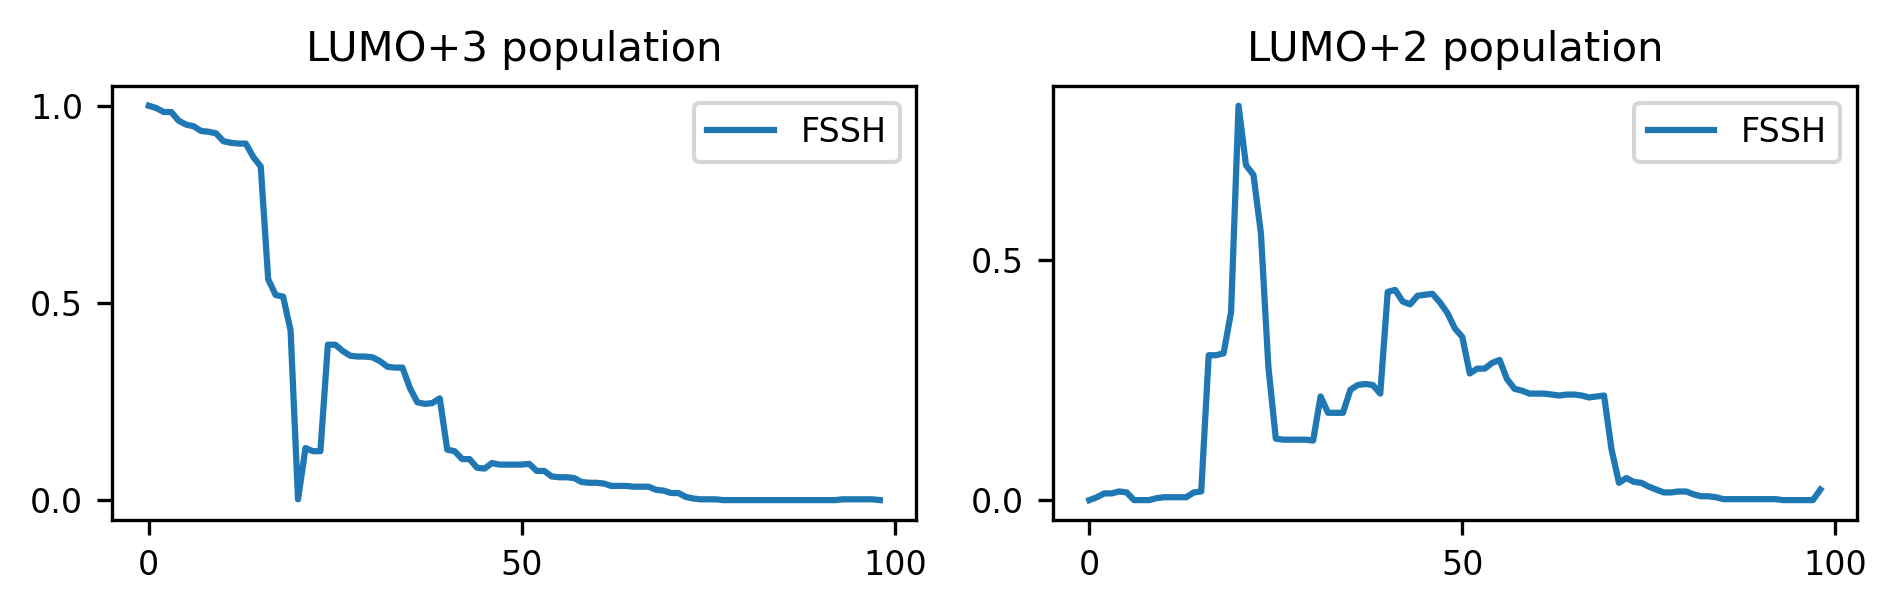

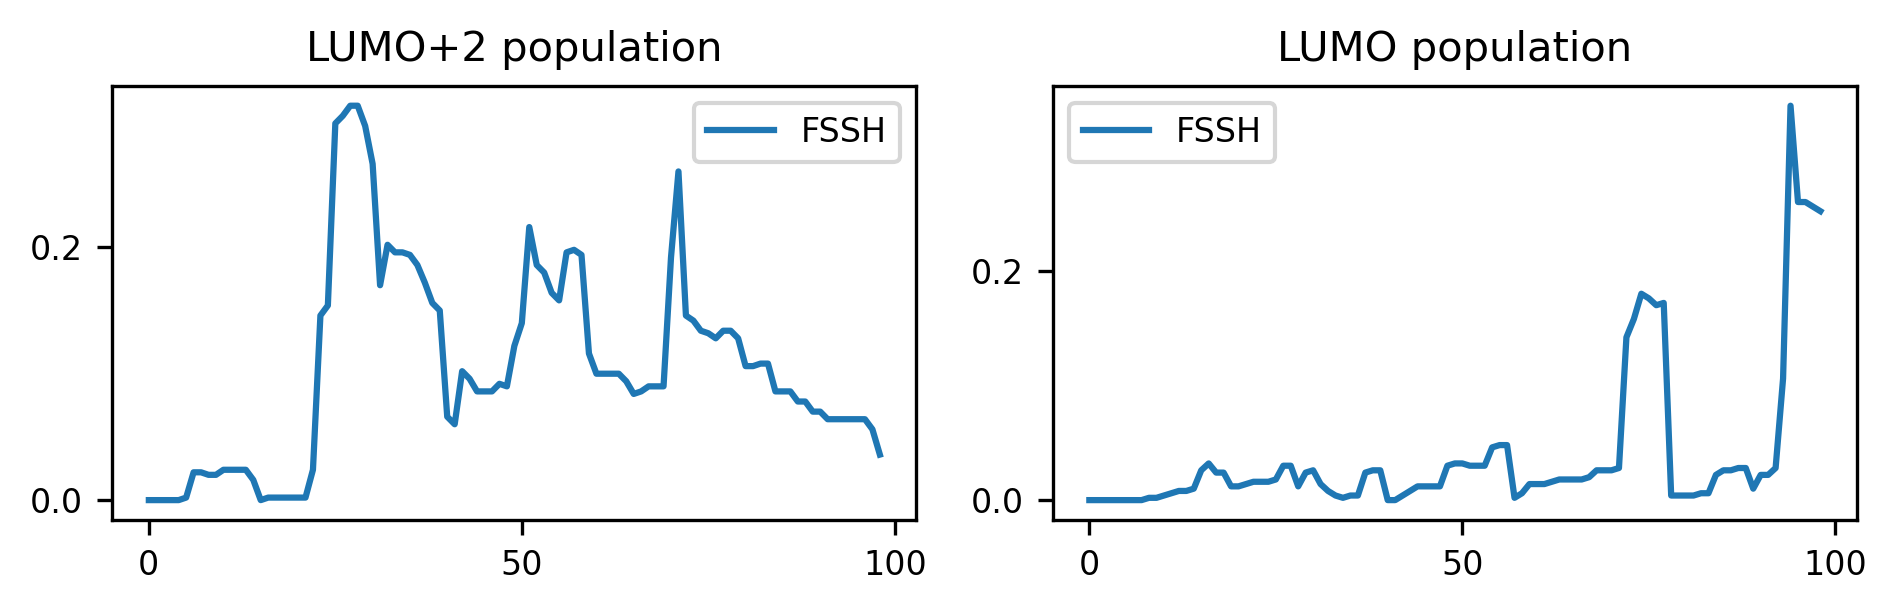

In [18]:
ks_lumo_population     = data_conv.unpack2(res_istate_lumo_p_3, 6)
ks_lumo_p_1_population = data_conv.unpack2(res_istate_lumo_p_3, 9)
ks_lumo_p_2_population = data_conv.unpack2(res_istate_lumo_p_3, 12)
ks_lumo_p_3_population = data_conv.unpack2(res_istate_lumo_p_3, 15)

ks_md_time = [ t for t in range(res_istate_lumo_p_3.num_of_rows) ]

xdata  = [ [ks_md_time], [ks_md_time] ]
ydata  = [ [ks_lumo_p_3_population], [ks_lumo_p_2_population] ]
titles = ['LUMO+3 population', 'LUMO+2 population']
labels = [ ['FSSH'] ]
data_visualize.plot_nparrays( plt, xdata, ydata, fig_width=6.42, fig_height=2.14, num_subplots=2, 
                              titles=titles, labels=labels, title_size=10, xticks_size=8,
                              yticks_size=8, n_superimposing=1 )

xdata  = [ [ks_md_time], [ks_md_time] ]
ydata  = [ [ks_lumo_p_1_population], [ks_lumo_population] ]
titles = ['LUMO+2 population', 'LUMO population']

plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=20)      # fontsize of the x and y labels
plt.rc('legend', fontsize=20)     # legend fontsize
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

data_visualize.plot_nparrays( plt, xdata, ydata, fig_width=6.42, fig_height=2.14, num_subplots=2,
                              titles=titles, labels=labels, title_size=10, xticks_size=8, 
                              yticks_size=8, n_superimposing=1 )


In [19]:
start = time.time()

params["decoherence_method"] = 1
res_ida_istate_lumo_p_3 = step4.run(hvib, params)
end = time.time()
print("Time to run IDA NBRA NAMD = ", end - start)

params["decoherence_method"] = 2
res_msdm_istate_lumo_p_3 = step4.run(hvib, params)
end = time.time()
print("Time to run mSDM NBRA NAMD = ", end - start)


params["decoherence_method"] = 3
res_dish_istate_lumo_p_3 = step4.run(hvib, params)
end = time.time()
print("Time to run DISH NBRA NAMD = ", end - start)


Time to run IDA NBRA NAMD =  2.036055564880371
Time to run mSDM NBRA NAMD =  3.7028019428253174
Time to run DISH NBRA NAMD =  5.772250413894653



You do not have a labels for every subplot. Assigning labels[0] to all subplots


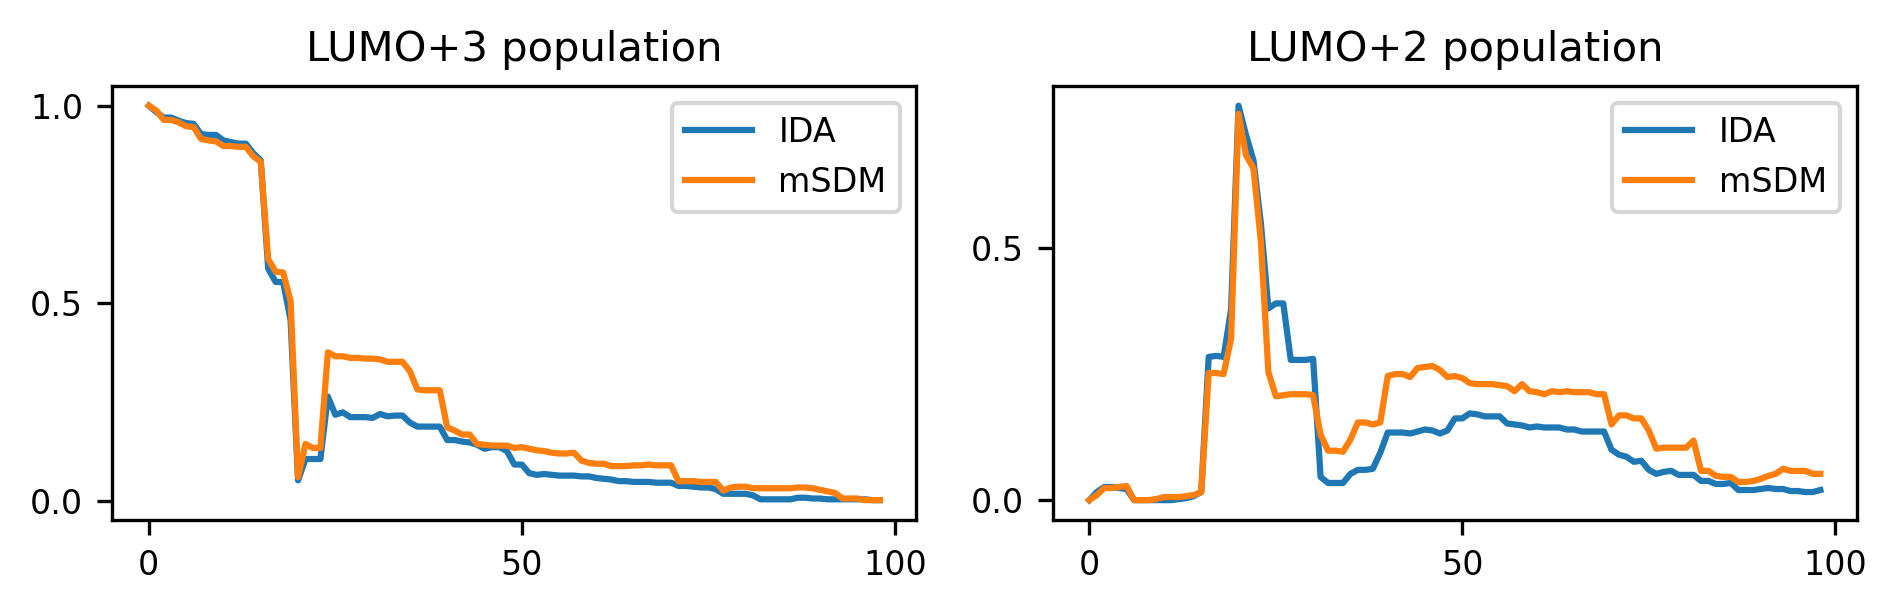

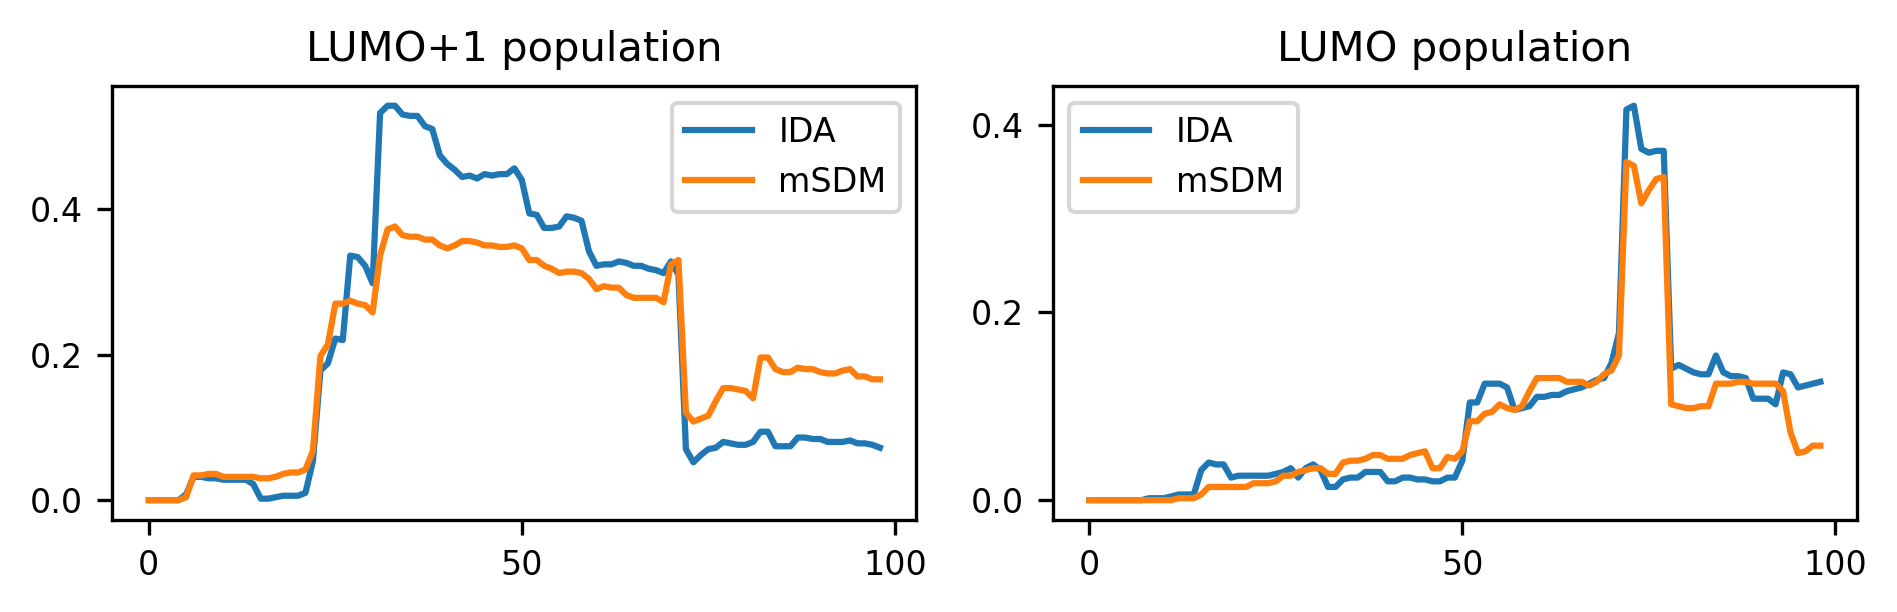

In [20]:
ks_ida_lumo_population     = data_conv.unpack2(res_ida_istate_lumo_p_3, 6)
ks_ida_lumo_p_1_population = data_conv.unpack2(res_ida_istate_lumo_p_3, 9)
ks_ida_lumo_p_2_population = data_conv.unpack2(res_ida_istate_lumo_p_3, 12)
ks_ida_lumo_p_3_population = data_conv.unpack2(res_ida_istate_lumo_p_3, 15)

ks_msdm_lumo_population     = data_conv.unpack2(res_msdm_istate_lumo_p_3, 6)
ks_msdm_lumo_p_1_population = data_conv.unpack2(res_msdm_istate_lumo_p_3, 9)
ks_msdm_lumo_p_2_population = data_conv.unpack2(res_msdm_istate_lumo_p_3, 12)
ks_msdm_lumo_p_3_population = data_conv.unpack2(res_msdm_istate_lumo_p_3, 15)

ks_dish_lumo_population     = data_conv.unpack2(res_msdm_istate_lumo_p_3, 6)
ks_dish_lumo_p_1_population = data_conv.unpack2(res_msdm_istate_lumo_p_3, 9)
ks_dish_lumo_p_2_population = data_conv.unpack2(res_msdm_istate_lumo_p_3, 12)
ks_dish_lumo_p_3_population = data_conv.unpack2(res_msdm_istate_lumo_p_3, 15)


xdata  = [ [ks_md_time], [ks_md_time] ]
ydata  = [ [ks_ida_lumo_p_3_population, ks_msdm_lumo_p_3_population],
           [ks_ida_lumo_p_2_population, ks_msdm_lumo_p_2_population], 
         ]
labels = [ ["IDA", "mSDM"] ]
titles = ['LUMO+3 population', 'LUMO+2 population']
data_visualize.plot_nparrays( plt, xdata, ydata, fig_width=6.42, fig_height=2.14, 
                              num_subplots=2, colors=["green", "purple"], 
                              titles=titles, labels=labels, title_size=10, xticks_size=8, 
                              yticks_size=8, n_superimposing=2 )


ydata  = [ [ks_ida_lumo_p_1_population, ks_msdm_lumo_p_1_population, ks_dish_lumo_p_1_population], 
           [ks_ida_lumo_population, ks_msdm_lumo_population, ks_dish_lumo_population], 
         ]
titles = ['LUMO+1 population', 'LUMO population']
data_visualize.plot_nparrays( plt, xdata, ydata, fig_width=6.42, fig_height=2.14, 
                              num_subplots=2, colors=["green, purple, orange"], 
                              titles=titles, labels=labels, title_size=10, xticks_size=8,                             
                              yticks_size=8, n_superimposing=2 )



In [21]:
#"""
#========================================================
# Looking on the "SE" populations - Markov chain approach
params["target_space"]       = 1
params["gap_min_exception"]  = 0
params["Boltz_opt_BL"]       = 1                      # Option to incorporate hte frustrated hops into BL probabilities
params["outfile"]            = "_out_BLLZ_NBRA_NAMD.txt" # output file
params["evolve_Markov"]      = True                   # Rely on the Markov approach
params["evolve_TSH"]         = False                  # don't care about TSH
params["ntraj"]              = 2                      # how many stochastic trajectories
params["istate"]             = 4                      # from 0

start = time.time()
res_bllz, P = lz.run(hvib, params)
end = time.time()
print("Time to run BL-LZ = ", end - start)


Time to run BL-LZ =  0.2379591464996338



You do not have a labels for every subplot. Assigning labels[0] to all subplots

You do not have a labels for every subplot. Assigning labels[0] to all subplots


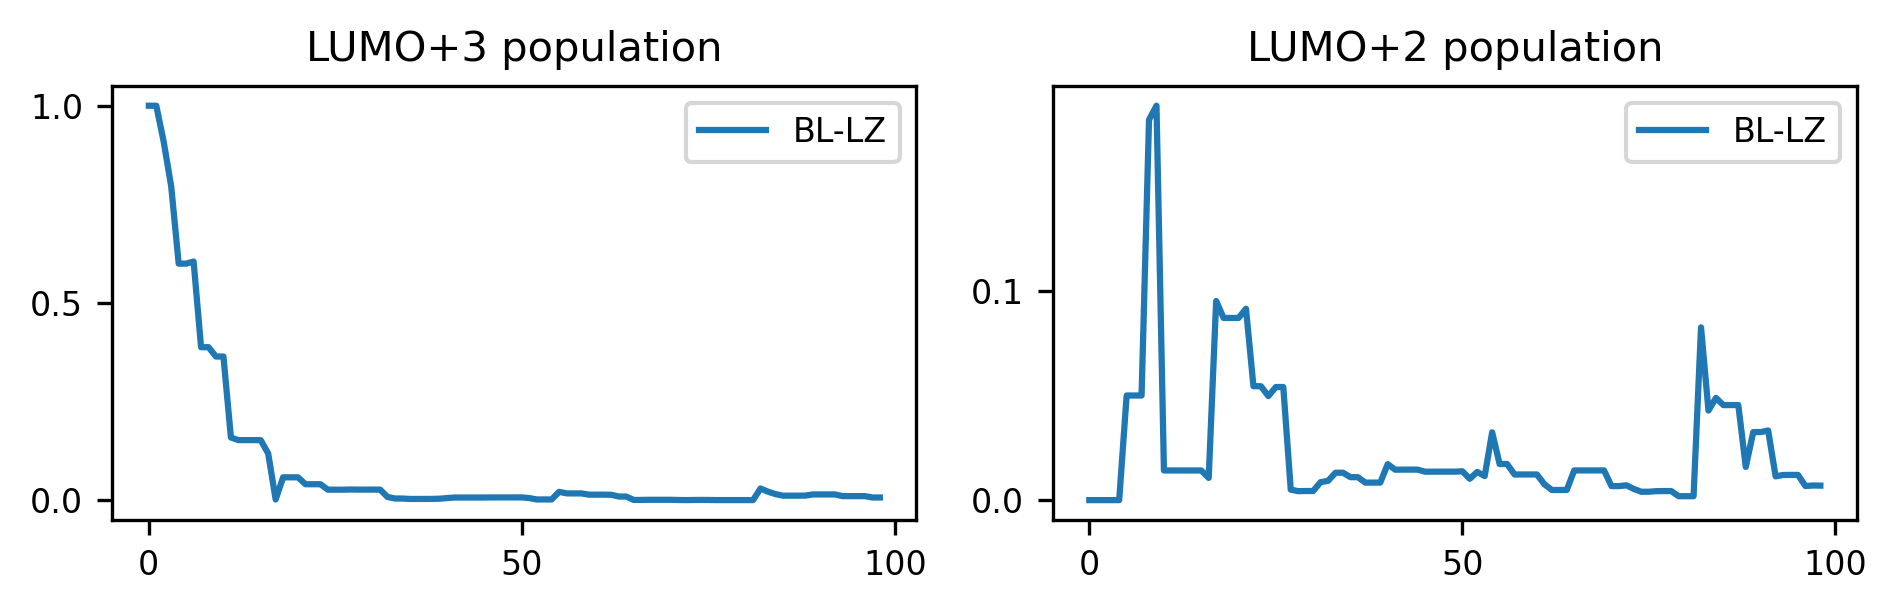

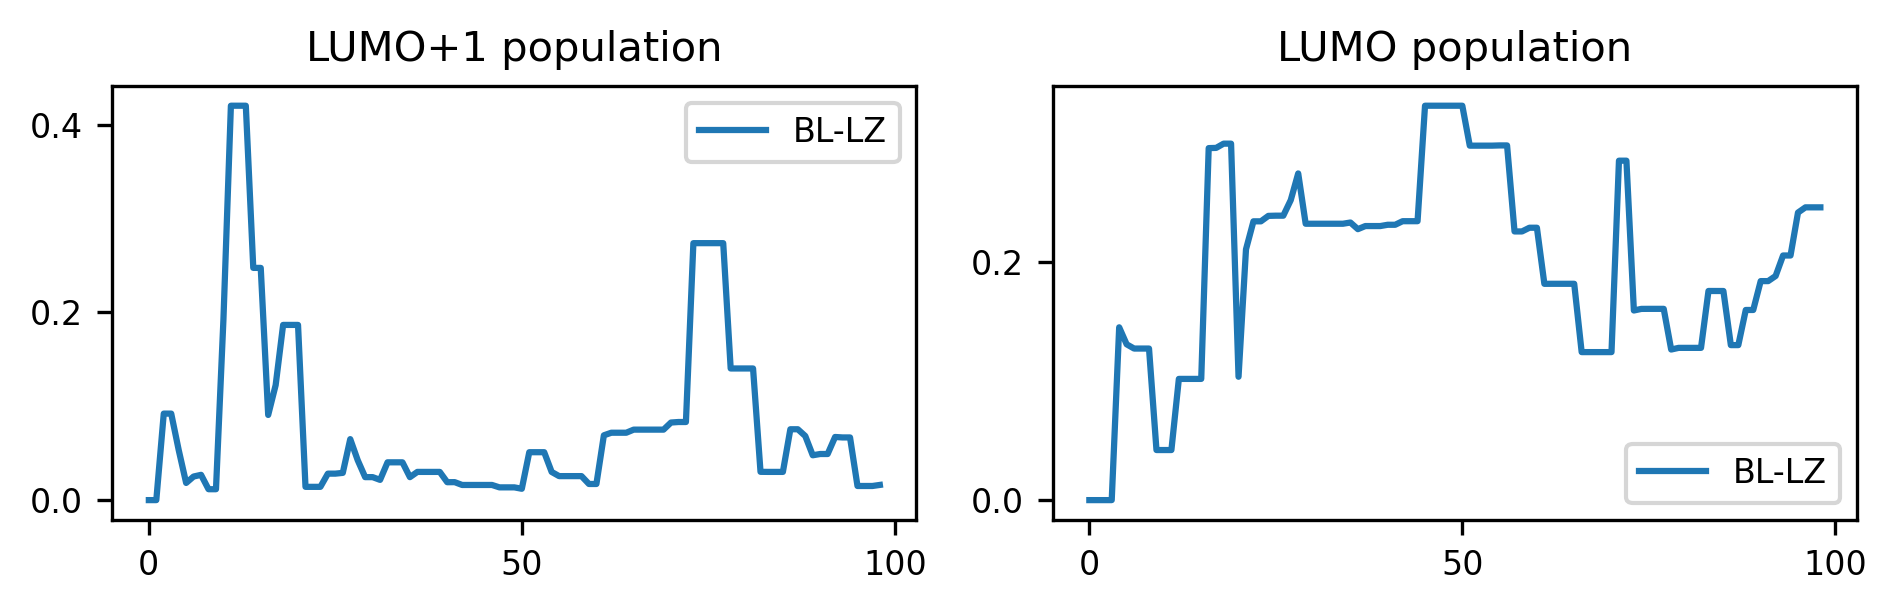

In [22]:
ks_time_dependent_energies = []

ks_bllz_lumo_population     = data_conv.unpack2(res_bllz, 5)
ks_bllz_lumo_p_1_population = data_conv.unpack2(res_bllz, 8)
ks_bllz_lumo_p_2_population = data_conv.unpack2(res_bllz, 11)
ks_bllz_lumo_p_3_population = data_conv.unpack2(res_bllz, 14)


xdata  = [ [ks_md_time], [ks_md_time] ]
ydata  = [ [ks_bllz_lumo_p_3_population], [ks_bllz_lumo_p_2_population] ]
titles = ['LUMO+3 population', 'LUMO+2 population']
labels = [ ["BL-LZ"] ]
data_visualize.plot_nparrays( plt, xdata, ydata, fig_width=6.42, fig_height=2.14, num_subplots=2,
                              titles=titles, labels=labels, title_size=10, xticks_size=8, yticks_size=8, 
                              n_superimposing=1 )

xdata  = [ [ks_md_time], [ks_md_time] ]
ydata  = [ [ks_bllz_lumo_p_1_population], [ks_bllz_lumo_population] ]
titles = ['LUMO+1 population', 'LUMO population']
labels = [ ["BL-LZ"] ]
data_visualize.plot_nparrays( plt, xdata, ydata, fig_width=6.42, fig_height=2.14, num_subplots=2,
                              titles=titles, labels=labels, title_size=10, xticks_size=8, yticks_size=8, 
                              n_superimposing=1 )



You do not have a labels for every subplot. Assigning labels[0] to all subplots


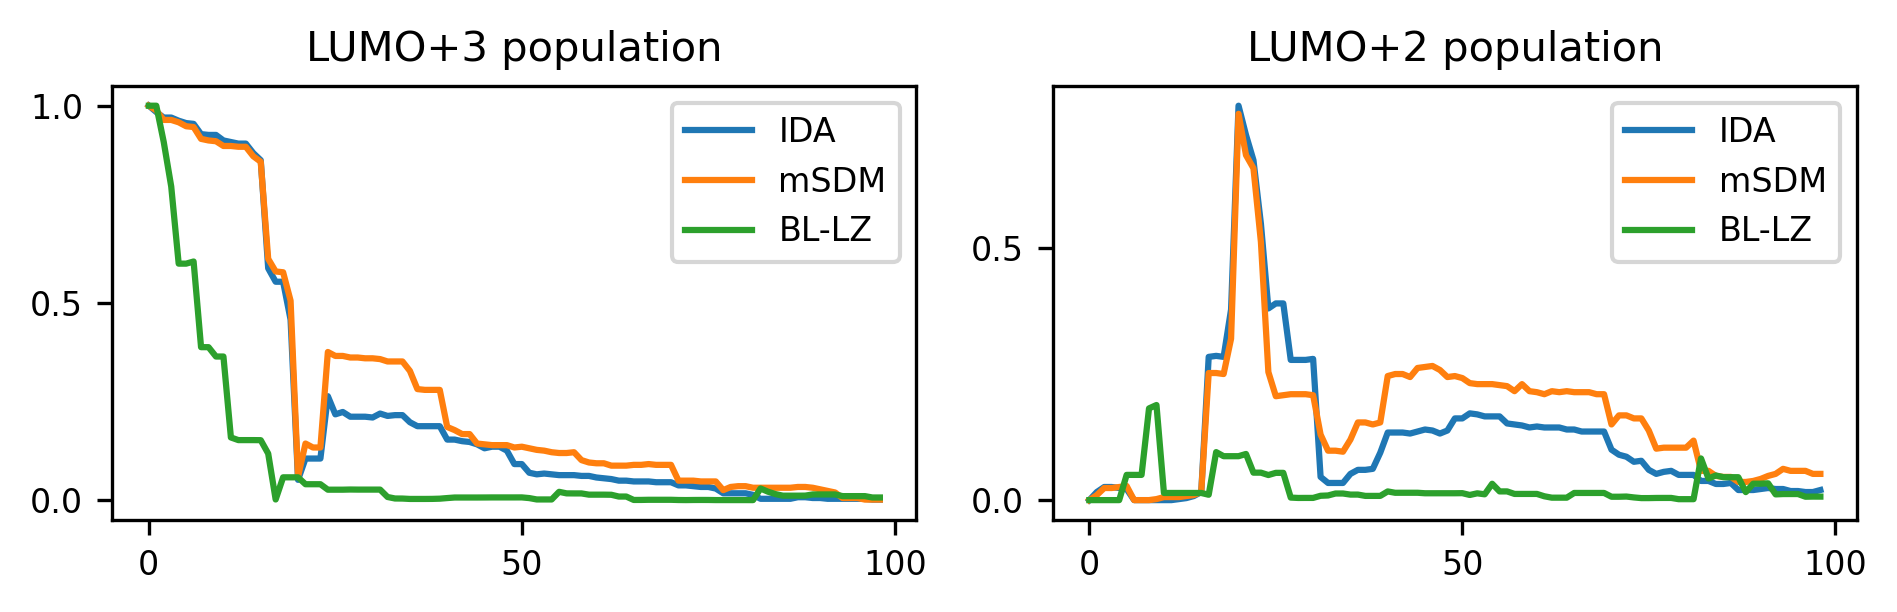

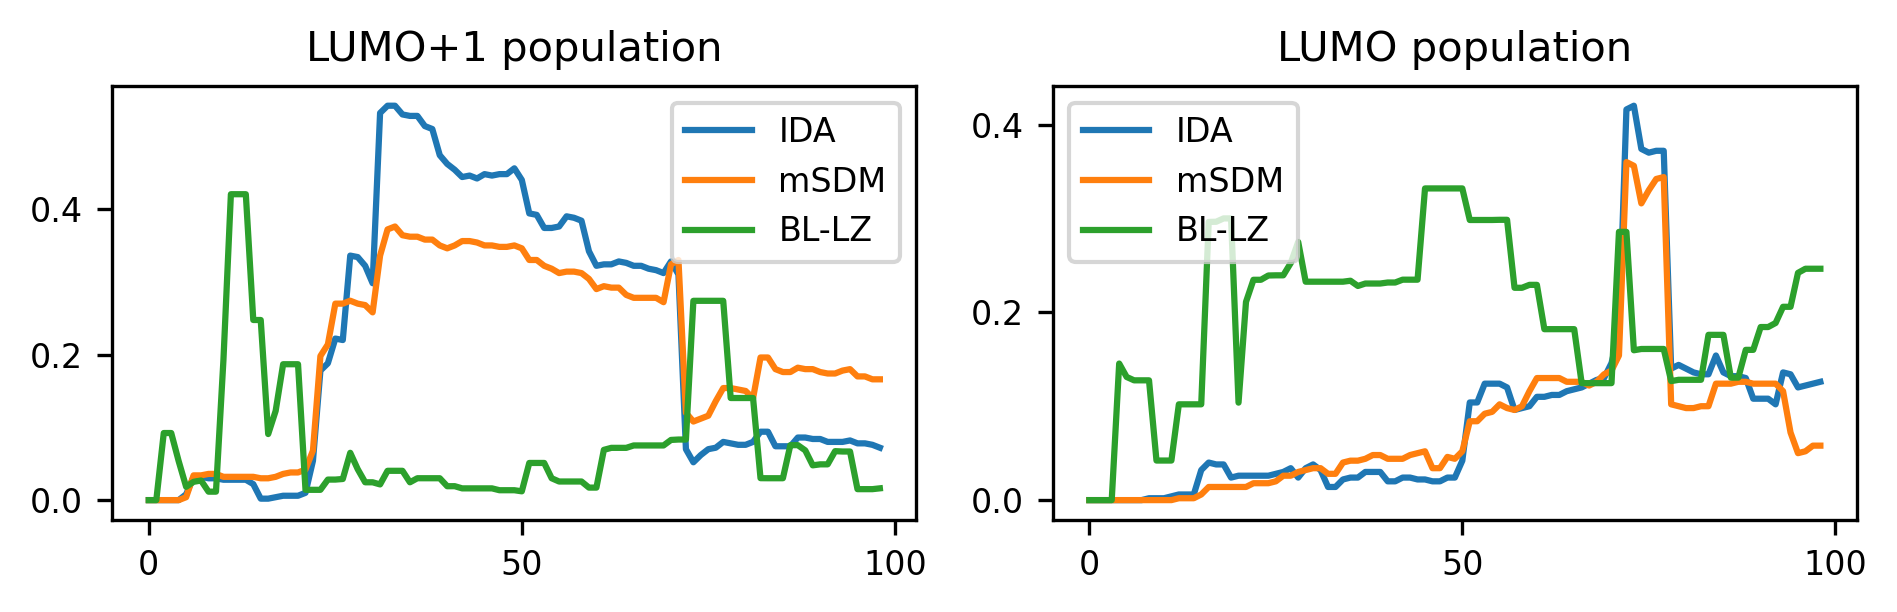

In [23]:
xdata  = [ [ks_md_time], [ks_md_time] ]
ydata  = [ 
           [ks_ida_lumo_p_3_population, ks_msdm_lumo_p_3_population, ks_bllz_lumo_p_3_population],
           [ks_ida_lumo_p_2_population, ks_msdm_lumo_p_2_population, ks_bllz_lumo_p_2_population],
         ]

labels = [ ["IDA", "mSDM", "BL-LZ"] ]
titles = ['LUMO+3 population', 'LUMO+2 population']
data_visualize.plot_nparrays( plt, xdata, ydata, fig_width=6.42, fig_height=2.14, num_subplots=2,
                              colors=["green, purple, red"], titles=titles, labels=labels,
                              title_size=10, xticks_size=8, yticks_size=8, n_superimposing=3 )

ydata  = [ 
           [ks_ida_lumo_p_1_population, ks_msdm_lumo_p_1_population, ks_bllz_lumo_p_1_population],
           [ks_ida_lumo_population, ks_msdm_lumo_population, ks_bllz_lumo_population],
         ]

titles = ['LUMO+1 population', 'LUMO population']
data_visualize.plot_nparrays( plt, xdata, ydata, fig_width=6.42, fig_height=2.14, num_subplots=2,
                              colors=["green, purple, red"], titles=titles, labels=labels,
                              title_size=10, xticks_size=8, yticks_size=8, n_superimposing=3 )


In [24]:
start = time.time()
params["decoherence_method"] = 0
params["istate"] = 1 #ground state is 0
res_fssh_istate_lumo = step4.run(hvib, params)
end = time.time()

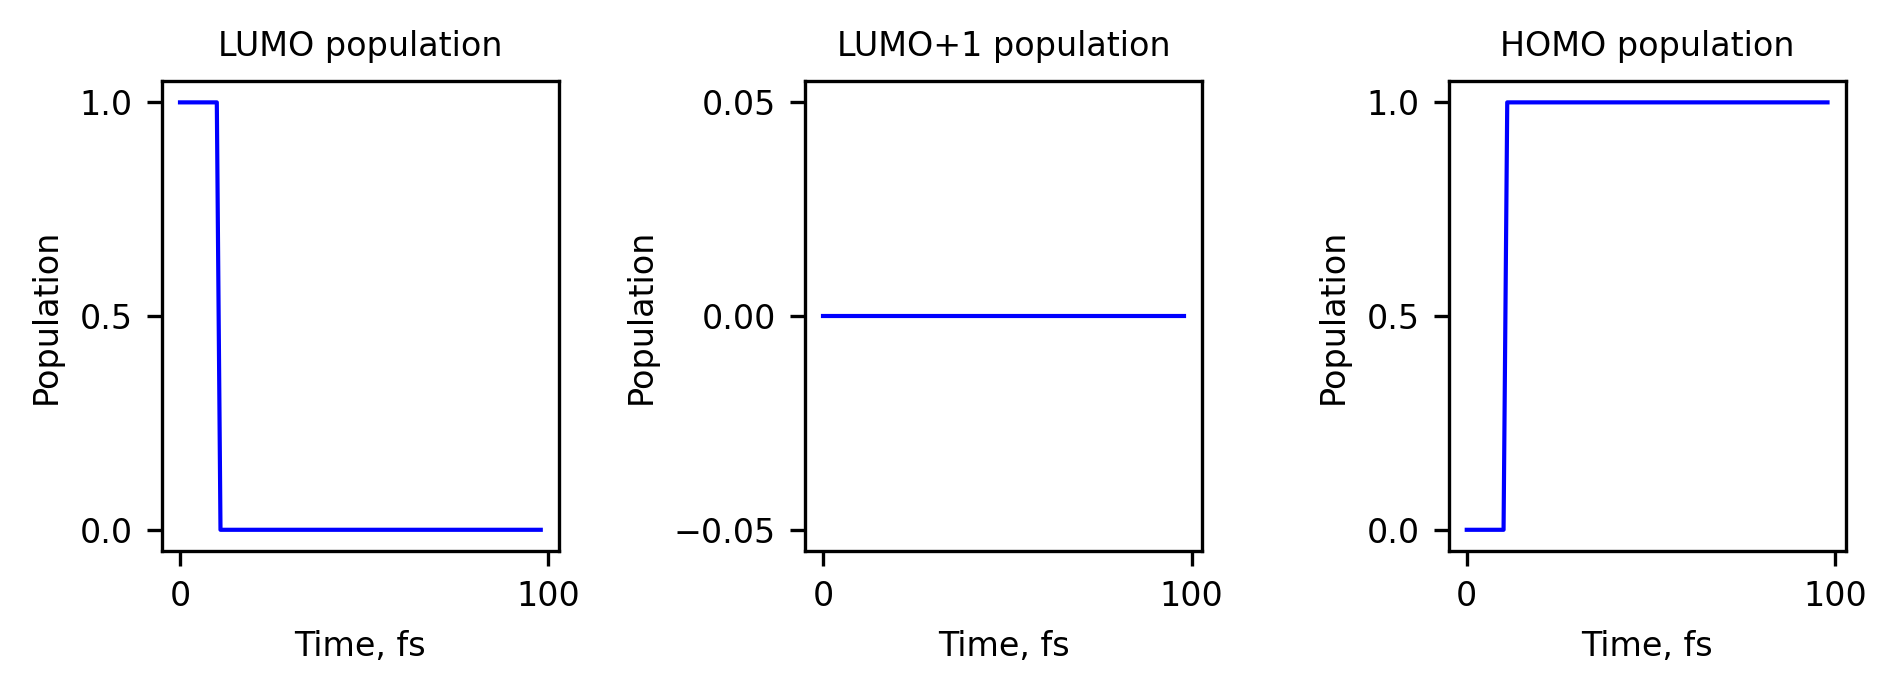

In [25]:
ks_time_dependent_energies = []

ks_fssh_homo_population     = data_conv.unpack2(res_fssh_istate_lumo, 3)
ks_fssh_lumo_population     = data_conv.unpack2(res_fssh_istate_lumo, 6)
ks_fssh_lumo_p_1_population = data_conv.unpack2(res_fssh_istate_lumo, 9)
ks_md_time = [ t for t in range(res_fssh_istate_lumo.num_of_rows) ]

plt.figure(num=None, figsize=(6.42, 2.41), dpi=300, edgecolor='black', frameon=True)
plt.subplot(1,3,1)
plt.title('LUMO population', fontsize=8)
plt.xlabel('Time, fs',fontsize=8)
plt.ylabel('Population',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.plot(ks_md_time, ks_fssh_lumo_population, label="", linewidth=1, color = "blue")

plt.subplot(1,3,2)
plt.title('LUMO+1 population', fontsize=8)
plt.xlabel('Time, fs',fontsize=8)
plt.ylabel('Population',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.plot(ks_md_time, ks_fssh_lumo_p_1_population, label="", linewidth=1, color = "blue")

plt.subplot(1,3,3)
plt.title('HOMO population', fontsize=8)
plt.xlabel('Time, fs',fontsize=8)
plt.ylabel('Population',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.plot(ks_md_time, ks_fssh_homo_population, label="", linewidth=1, color = "blue")
plt.tight_layout()